<a href="https://colab.research.google.com/github/RaianaSeixas/GERENCIADOR/blob/master/1_WOA_Main_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/RaianaSeixas/GERENCIADOR.git #clonar do Github

Cloning into 'GERENCIADOR'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 101 (delta 5), reused 0 (delta 0), pack-reused 85
Receiving objects: 100% (101/101), 44.09 KiB | 8.82 MiB/s, done.
Resolving deltas: 100% (49/49), done.


In [3]:
%cd
%cd /content/GERENCIADOR
!ls

/root
/content/GERENCIADOR
1_WOA_Main_R.ipynb    4_GWO_Main_R.ipynb    Enxame.py	 PSO.py
2_ABC_Main_R.ipynb    ABCMC.py		    Function.py  WOA.py
2_ABCMC_Main_R.ipynb  ABC.py		    GWO.py
3_PSO_Main_R.ipynb    DE_jun_16_2019.ipynb  MUT.py


In [4]:
import WOA
import Function
import Enxame
import time
import numpy as np
############################### Função
'''
Fun=Function.Rosenbrock
dim=30
MAX=np.repeat(10,dim)
MIN=np.repeat(-10,dim)
#MAX=[30,30] # MAXIMO DE CADA PARAMETRO
#MIN=[-30,-30] # MINIMO DE CADA PARAMETRO
  #Global optimum: f(xi)= 0
'''
'''
Fun=Function.Shubert
MAX=[10,10] # MAXIMO DE CADA PARAMETRO
MIN=[-10,-10] # MINIMO DE CADA PARAMETRO
  # Global Minimum: -186.7309 ; xi ∈ [-10,10]
'''
#'''
dim=3
Fun=Function.Schwefel
MAX=np.repeat(500,dim)
MIN=np.repeat(-500,dim)
#MAX=[500,500] # MAXIMO DE CADA PARAMETRO
#MIN=[-500,-500] # MINIMO DE CADA PARAMETRO
  #Global optimum: f(xi)= 0 for xi = 420.968746 for i=1,...,n  ;  xi in [-500,500]  
#'''

############################### DADOS DE ENTRADA 
NPAR=175 #Baleias
ITE=300 #ITERACOES
PAR=len(MAX) #NUM DE PARAMETROS A SER OTIMIZADOS
RUNS=100

############################## RESOLUÇÃO E IMPRESSÃO
start_time = time.time()

BEST_AGENTS=[]
for i in range(RUNS):

    X=Enxame.Enxame(PAR,NPAR,MAX,MIN) # inicializa baleias
    BEST_WOA,FOBEST_WOA,XY_WOA,BEST_XY_WOA=WOA.WOA(ITE,PAR,NPAR,MAX,MIN,Fun,X) #Roda Algoritmo
    BEST_AGENTS.append(BEST_XY_WOA)

#print("BEST=",BEST_WOA,"  FOBEST=",FOBEST_WOA,"\n")


############################## Cálculo dos Parâmetros de Avaliação   
TIME = (time.time() - start_time)/RUNS
BEST_AGENTS=np.array(BEST_AGENTS)
BEST_AGENTS_ST= BEST_AGENTS[BEST_AGENTS[:,-1].argsort()]
BEST=BEST_AGENTS_ST[0]
WORSE=BEST_AGENTS_ST[-1]
MEAN=np.mean(BEST_AGENTS,axis=0)
MAXFO=BEST_AGENTS[:,-1].max()
MINFO=BEST_AGENTS[:,-1].min()
STD=BEST_AGENTS[:,-1].std()

print("\n","WOA _",NPAR,"Agentes _",ITE,"Iterações _","Min/Max=",MIN[0],"/",MAX[0],'_',Fun.__name__)
print('Métodos simples:',NPAR,'Agentes_',ITE,'Iterações_','Dim=', PAR, '\n')
#print('BEST: ',BEST)
#print('MÉDIA: ',MEAN)
print('MÉDIA: ',MEAN[-1])
print('MIN __: ',MINFO)
print('MAX__: ',MAXFO)
print('STD __: ',STD)
print("Tempo Médio= %.3f segundos ---" % (TIME))
print(RUNS,'Rodadas')


 WOA _ 175 Agentes _ 300 Iterações _ Min/Max= -500 / 500 _ Schwefel
Métodos simples: 175 Agentes_ 300 Iterações_ Dim= 3 

MÉDIA:  5.954187033310493
MIN __:  0.0016598206225353351
MAX__:  118.4636385142012
STD __:  25.80842192511937
Tempo Médio= 2.017 segundos ---
100 Rodadas


{'boxes': [<matplotlib.lines.Line2D at 0x7f458978cd30>],
 'caps': [<matplotlib.lines.Line2D at 0x7f458979a588>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f45897aa2b0>],
 'means': [<matplotlib.lines.Line2D at 0x7f458979af60>],
 'medians': [<matplotlib.lines.Line2D at 0x7f458979ac18>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f458978ceb8>,
  <matplotlib.lines.Line2D at 0x7f458979a240>]}

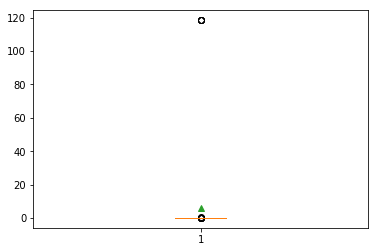

In [5]:
best=BEST_AGENTS[:,-1]
import matplotlib.pyplot as plt
plt.boxplot(best,showmeans=True)

{'boxes': [<matplotlib.lines.Line2D at 0x7f4586f20f98>],
 'caps': [<matplotlib.lines.Line2D at 0x7f4586f2a7f0>,
 'fliers': [],
 'means': [<matplotlib.lines.Line2D at 0x7f4586f32208>],
 'medians': [<matplotlib.lines.Line2D at 0x7f4586f2ae80>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f4586f2a128>,
  <matplotlib.lines.Line2D at 0x7f4586f2a4a8>]}

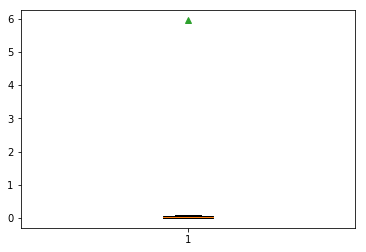

In [6]:
plt.boxplot(best,showmeans=True,sym='')